**IMPORTANT** - running on the full Preston observatory uses about 12GB of memory as of 10/14/2019

In [2]:
import numpy as np
import pandas as pd
from enum import Enum

from nquads import NQuads
from prestongraph import *

### Get provenance log

On a large preston.acis.ufl.edu observatory it can take a while to run ```preston ls```, so we store its output at a temporary location
```shell
preston ls --remote http://preston.acis.ufl.edu > tmp/nquads
```

### Index the provenance logs

In [3]:
class Observatory:
    def __init__(self, name, dataPath=None, outputPath=None):
        self.name = name
        self.dataPath = dataPath
        self.index = None
        
        if outputPath is not None:
            self.outputPath = outputPath
        else:
            self.outputPath = "./" + name.lower().replace(" ", "-") + "-analysis/"

In [69]:
def MakeIndexFromLogs(paths):
    #import sys
    #import io
    global line
    global nQuad
    index = Index()

    if type(paths) == str:
        paths = [paths]
    #sys.stdin = io.FileIO(path)

    # Parse the provenance log into a list of n-quads
    for path in paths:
        with open(path) as file:
            parsingGenerations = False
            for line in file:
                nQuads = NQuads.Parse(str(line))
                for nQuad in nQuads:
                    if len(nQuad) < 3: # Only ingest well-formed n-quads
                        continue
                    elif not parsingGenerations:
                        if nQuad[1][0] == "http://www.w3.org/ns/prov#qualifiedGeneration":
                            parsingGenerations = True
                        elif nQuad[1][0] not in (
                            "http://www.w3.org/ns/prov#Activity",
                            "http://purl.org/dc/terms/description",
                            "http://www.w3.org/ns/prov#startedAtTime"
                        ):
                            continue
                    index.Ingest(nQuad)

    return index

In [ ]:
observatories = []

In [60]:
observatories.append(Observatory("iDigBio", "../zenodo_deeplinker/idigbio.nq"))

In [ ]:
observatories.append(Observatory("GBIF", "../zenodo_deeplinker/gbif.nq"))

In [115]:
observatories.append(Observatory("DataONE", "../zenodo_dataone/nquads"))

In [117]:
observatories.append(Observatory("BHL", "../zenodo_bhl/nquads"))

In [ ]:
# observatories.append(Observatory("Deeplinker", "../zenodo_deeplinker/nquads"))

In [ ]:
observatories.append(Observatory("All", [x.dataPath for x in observatories]))

In [118]:
%%time

import os

for observatory in observatories:
    if observatory.index is not None:
        print("Skipping %s; already loaded" % observatory.name)
        continue

    # Prepare a place to store results
    try:
        os.mkdir(observatory.outputPath)
    except OSError:
        pass
    
    # Make an index
    if observatory.dataPath is None:
        print("Skipping %s; data path not specified" % observatory.name)
    else:
        print("Reading %s..." % observatory.name)
        %time observatory.index = MakeIndexFromLogs(observatory.dataPath)
        print("Done reading %s\n" % observatory.name)

Skipping iDigBio; already loaded
Skipping GBIF; already loaded
Reading DataONE...
CPU times: user 8min 30s, sys: 1min 36s, total: 10min 6s
Wall time: 10min 6s
Done reading DataONE

Reading BHL...
CPU times: user 4min 20s, sys: 1min 13s, total: 5min 33s
Wall time: 5min 33s
Done reading BHL

CPU times: user 12min 50s, sys: 2min 49s, total: 15min 39s
Wall time: 15min 39s


In [971]:
observatory = observatories[3]
observatoryName = observatory.name
fullIndex = observatory.index
outputPath = observatory.outputPath
dataPath = observatory.dataPath
print("Using %s" % observatoryName)

Using BHL


In [972]:
for x in fullIndex.verbLookup["http://www.w3.org/ns/prov#startedAtTime"].triples: print(x)

e9de00b7-7a4f-4e47-aa2d-986811ea009c	http://www.w3.org/ns/prov#startedAtTime	2019-05-13T17:10:37.661Z
5e092894-4aae-4b5d-b07b-925f4251725a	http://www.w3.org/ns/prov#startedAtTime	2019-10-01T11:40:13.365Z
d8afa467-0bd4-4fa8-b618-2944e96bb7d0	http://www.w3.org/ns/prov#startedAtTime	2019-09-01T09:06:39.430Z
f3cfd1e7-2b32-4b28-8c6b-607dccffa636	http://www.w3.org/ns/prov#startedAtTime	2019-08-01T11:59:32.756Z
a554958b-171f-43b6-a369-45f3c695e494	http://www.w3.org/ns/prov#startedAtTime	2019-07-01T18:50:09.802Z
21014813-c4f0-48cd-9046-e7d55e7702da	http://www.w3.org/ns/prov#startedAtTime	2019-10-13T23:27:52.877Z
71d81267-4370-4b48-a384-b80f6e58919c	http://www.w3.org/ns/prov#startedAtTime	2019-06-01T00:36:19.222Z


In [973]:
print("{:,}".format(len(fullIndex.nodes)), "nodes")

2,873,739 nodes


In [974]:
# formats = set()

# for x in fullIndex.verbLookup["http://purl.org/dc/elements/1.1/format"].triples:
#     formats.add(x.object)

# for x in formats: print(x)

In [975]:
for x in fullIndex.verbs: print(x)

http://www.w3.org/ns/prov#generatedAtTime
http://www.w3.org/ns/prov#wasStartedBy
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://purl.org/pav/createdBy
http://www.w3.org/ns/prov#activity
http://purl.org/dc/terms/bibliographicCitation
http://www.w3.org/ns/prov#qualifiedGeneration
http://purl.org/pav/hasVersion
http://www.w3.org/ns/prov#used
http://www.w3.org/ns/prov#hadMember
http://purl.org/dc/elements/1.1/format
http://www.w3.org/ns/prov#wasAssociatedWith
http://www.w3.org/ns/prov#usedBy
http://www.w3.org/1999/02/22-rdf-syntax-ns#seeAlso
http://www.w3.org/ns/prov#wasGeneratedBy
http://purl.org/dc/terms/description
http://www.w3.org/ns/prov#startedAtTime


In [976]:
def PrintNodeSubTree(node, maxDepth=1, root=True):
    if root:
        for x in node.inwardTriples:
            print(x)

    if maxDepth > 0:
        for x in node.outwardTriples:
            print(x)
            PrintNodeSubTree(x.object, maxDepth - 1, False)

def Peek(nativeSet):
    if len(nativeSet) == 0:
        return None
    else:
        item = nativeSet.pop()
        nativeSet.add(item)
        return item

def ContentIsMissing(content):
    return str(content).startswith("http")

### Get crawl UUIDs and sort them by date

In [977]:
class CrawlMeta:
    def __init__(self, position, date):
        # Properties
        self.position = position
        self.date = date

In [978]:
checkDescription = ("http://purl.org/dc/terms/description" in fullIndex.verbLookup)
startDate = "2019-03-01"
endDate = "2019-10-1"

crawlDates = []
for triple in fullIndex.verbLookup["http://www.w3.org/ns/prov#startedAtTime"].triples:
    crawlUuid = triple.subject
    crawlDate = triple.object

    if crawlDate < startDate:
        print("Ignoring early crawl log %s (\"%s\")" % (str(crawlUuid), str(crawlDate)))
    else:
        if checkDescription:
            descriptionTriple = Peek(crawlUuid.outwardTriples & fullIndex.verbLookup["http://purl.org/dc/terms/description"].triples)
            if descriptionTriple.object == "A crawl event that discovers biodiversity archives.":
                crawlDates.append((crawlUuid, crawlDate))
            else:
                print("Ignoring non-crawl log %s (\"%s\")" % (str(crawlUuid), str(descriptionTriple.object)))
        else:
            crawlDates.append((crawlUuid, crawlDate))
numCrawls = len(crawlDates)

crawlDates.sort(key=lambda x: x[1])

print()
# Assign some helpful metadata to each crawl
crawlMetaLookup = dict()
for i, crawlDate in enumerate(crawlDates):
    # Tag crawl nodes with their chronological position in the preston history
    crawlMeta = CrawlMeta(
        position=i,
        date=crawlDate[1]
    )

    crawlMetaLookup[crawlDate[0]] = crawlMeta

    print("%s\t%s\t%d" % (crawlDate[0], crawlMeta.date, crawlMeta.position))

Ignoring non-crawl log 21014813-c4f0-48cd-9046-e7d55e7702da ("An event that (re-) processes existing biodiversity datasets graphs and their provenance.")

e9de00b7-7a4f-4e47-aa2d-986811ea009c	2019-05-13T17:10:37.661Z	0
71d81267-4370-4b48-a384-b80f6e58919c	2019-06-01T00:36:19.222Z	1
a554958b-171f-43b6-a369-45f3c695e494	2019-07-01T18:50:09.802Z	2
f3cfd1e7-2b32-4b28-8c6b-607dccffa636	2019-08-01T11:59:32.756Z	3
d8afa467-0bd4-4fa8-b618-2944e96bb7d0	2019-09-01T09:06:39.430Z	4
5e092894-4aae-4b5d-b07b-925f4251725a	2019-10-01T11:40:13.365Z	5


### Build a history for each URL

In [979]:
class Status(Enum):
    UNKNOWN             = 0    # Did not check for content
    FIRST_CONTENT       = 1    # Returned content for the first time
    SAME_CONTENT        = 2    # Returned the same content as the last successful query
    CHANGED_CONTENT     = 3    # Returned new content
    OLD_CONTENT         = 4    # Returned previously seen content that is different from the previous successful data
    BECAME_UNRESOLVED   = 5    # Failed to return content after a successful query
    STILL_UNRESOLVED    = 6    # Failed to return content again
    ERROR               = 7    # Returned malformed content

class UrlLifetime:
    def __init__(self, numCrawls):
        self.statuses = [Status.UNKNOWN] * numCrawls
        self.contents = [None] * numCrawls

        self.firstCrawlPosition = None
        self.lastCrawlPosition = None
        self.lastKnownStatus = Status.UNKNOWN
        self.firstChangePosition = None
        self.firstBreakPosition = None

        self.numResolves = 0
        self.numBreaks = 0
        self.numContents = 0
        self.numContentChanges = 0

class ContentLifetime:
    def __init__(self, numCrawls):
        self.firstCrawlPosition = None
        self.lastCrawlPosition = None

### Collect the contents seen over the course of each URL's lifetime

In [980]:
%%time

numGenerationsIgnored = 0

contentLifetimes = dict()
urlLifetimes = dict()
for x in fullIndex.verbLookup["http://www.w3.org/ns/prov#qualifiedGeneration"].triples:
    qualGen = x.object

    # Get content
    contentTriple = Peek(qualGen.inwardTriples & fullIndex.verbLookup["http://www.w3.org/ns/prov#qualifiedGeneration"].triples)
    content = contentTriple.subject

    # Get URL
    urlTriple = Peek(qualGen.outwardTriples & fullIndex.verbLookup["http://www.w3.org/ns/prov#used"].triples)
    url = urlTriple.object

    # Get crawl
    crawlTriple = Peek(qualGen.outwardTriples & fullIndex.verbLookup["http://www.w3.org/ns/prov#activity"].triples)
    crawl = crawlTriple.object
    
    # Skip generations from ignored crawls
    if crawl not in crawlMetaLookup:
        numGenerationsIgnored += 1
        continue

    crawlMeta = crawlMetaLookup[crawl]

    # Fill in URL lifetime data
    if url in urlLifetimes:
        lifetime = urlLifetimes[url]
    else:
        lifetime = UrlLifetime(numCrawls)
        urlLifetimes[url] = lifetime

    if lifetime.firstCrawlPosition == None or crawlMeta.position < lifetime.firstCrawlPosition:
        lifetime.firstCrawlPosition = crawlMeta.position

    if lifetime.lastCrawlPosition == None or crawlMeta.position > lifetime.lastCrawlPosition:
        lifetime.lastCrawlPosition = crawlMeta.position

    lifetime.contents[crawlMeta.position] = content
    
    # Fill in content lifetime data
    if not ContentIsMissing(content):
        if content in contentLifetimes:
            lifetime = contentLifetimes[content]
        else:
            lifetime = ContentLifetime(numCrawls)
            contentLifetimes[content] = lifetime
        
        if lifetime.firstCrawlPosition == None or crawlMeta.position < lifetime.firstCrawlPosition:
            lifetime.firstCrawlPosition = crawlMeta.position

        if lifetime.lastCrawlPosition == None or crawlMeta.position > lifetime.lastCrawlPosition:
            lifetime.lastCrawlPosition = crawlMeta.position

CPU times: user 16.8 s, sys: 1.89 s, total: 18.7 s
Wall time: 18.7 s


In [981]:
totalNumUrls = len(urlLifetimes)
print("{:,}".format(numGenerationsIgnored), "generations ignored")
print("{:,}".format(totalNumUrls), "urls processed")

0 generations ignored
248,514 urls processed


### Assign a status for each stage of each URL's lifetime

There's some ambiguity in the status of a URL's first query; we make some arbitrary, totally unfounded assumptions:
* If unresolved, consider it BECAME_UNRESOLVED rather than STILL_UNRESOLVED
* If resolved, consider it FIRST_CONTENT rather than SAME_CONTENT, OLD_CONTENT, or CHANGED_CONTENT

In [982]:
%%time

for url, lifetime in urlLifetimes.items():
    wasAlive = True
    mostRecentContent = None
    for i, content in enumerate(lifetime.contents):

        if content:
            if ContentIsMissing(content):
        # Became unresolved
                if wasAlive:
                    status = Status.BECAME_UNRESOLVED
                    lifetime.numBreaks += 1

        # Still unresolved
                else:
                    status = Status.STILL_UNRESOLVED

                wasAlive = False
            
                if lifetime.firstBreakPosition is None:
                    lifetime.firstBreakPosition = i

        # First content
            else:
                if mostRecentContent == None:
                    status = Status.FIRST_CONTENT
                    mostRecentContent = content
                    lifetime.numContents += 1

        # Same content
                elif content == mostRecentContent:
                    status = Status.SAME_CONTENT

                else:
        # Old content
                    if content in lifetime.contents[0:i]:
                        status = Status.OLD_CONTENT

        # Changed content
                    else:
                        status = Status.CHANGED_CONTENT
                        if lifetime.firstChangePosition is None:
                            lifetime.firstChangePosition = i
                        lifetime.numContents += 1

                    mostRecentContent = content
                    lifetime.numContentChanges += 1

                wasAlive = True
                lifetime.numResolves += 1

            lifetime.lastKnownStatus = status
        # Unknown
        else:
            status = Status.UNKNOWN

        lifetime.statuses[i] = status

CPU times: user 2.66 s, sys: 0 ns, total: 2.66 s
Wall time: 2.67 s


In [983]:
list(urlLifetimes.items())[0][1].contents

In [984]:
textUrlLifetimes = dict()
for url, lifetime in urlLifetimes.items():
    textContents = [None] * numCrawls
    for i, content in enumerate(lifetime.contents):
        textContents[i] = str(content)
    textUrlLifetimes[str(url)] = textContents

np.save(outputPath + "url-lifetimes", textUrlLifetimes)

In [985]:
len(textUrlLifetimes)

248514

In [986]:
print("Lifetime for %s\n" % url)
print("\n".join(["%d:\t%s\t%s" % (i, lifetime.statuses[i], lifetime.contents[i]) for i in range(numCrawls)]))

Lifetime for https://archive.org/download/burbankseedbook00burbt/burbankseedbook00burbt_djvu.txt

0:	Status.UNKNOWN	None
1:	Status.UNKNOWN	None
2:	Status.UNKNOWN	None
3:	Status.UNKNOWN	None
4:	Status.UNKNOWN	None
5:	Status.FIRST_CONTENT	hash://sha256/66832bed2643b95a9218df586b1eefbdf6cf4135308814eb98d0b5d14eddbef9


## Build figures
These should probably be colorless (i.e. use black and white textures and dotted lines)

### New, modified, lost content per crawl

In [987]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from itertools import cycle, islice

%matplotlib inline

In [988]:
dict([(status, 0) for status in Status])

{<Status.UNKNOWN: 0>: 0,
 <Status.FIRST_CONTENT: 1>: 0,
 <Status.SAME_CONTENT: 2>: 0,
 <Status.CHANGED_CONTENT: 3>: 0,
 <Status.OLD_CONTENT: 4>: 0,
 <Status.BECAME_UNRESOLVED: 5>: 0,
 <Status.STILL_UNRESOLVED: 6>: 0,
 <Status.ERROR: 7>: 0}

In [989]:
%%time

crawlStatusTotals = [(dict([(status, 0) for status in Status])) for crawlDate in crawlDates]
# for crawl in range(numCrawls):
#     crawlStatusTotals[crawl] = 

# crawlStatusTotals = dict()


for _, lifetime in urlLifetimes.items():
    for i, status in enumerate(lifetime.statuses):
        crawlStatusTotals[i][status] += 1

# crawl_status_totals_df = pd.DataFrame(
#     index   = [datetime.datetime.strptime(str(x[1]), "%Y-%m-%dT%H:%M:%S.%fZ") for x in crawlDates],
#     columns = [x for x in Status],
#     data    = ,
#     dtype   = int
# )

crawl_status_totals_df = pd.DataFrame(
    index = [datetime.datetime.strptime(str(x[1]), "%Y-%m-%dT%H:%M:%S.%fZ") for x in crawlDates],
    data = crawlStatusTotals
)

CPU times: user 688 ms, sys: 0 ns, total: 688 ms
Wall time: 693 ms


In [990]:
crawl_status_totals_df.to_csv(outputPath + "crawl-status-totals-df")
crawl_status_totals_df.transpose()

,2019-05-13 17:10:37.661000,2019-06-01 00:36:19.222000,2019-07-01 18:50:09.802000,2019-08-01 11:59:32.756000,2019-09-01 09:06:39.430000,2019-10-01 11:40:13.365000
Status.UNKNOWN,6011,6011,4061,3505,3504,336
Status.FIRST_CONTENT,227043,33,1983,561,1,3443
Status.SAME_CONTENT,0,184882,227048,228952,153437,229513
Status.CHANGED_CONTENT,0,1,5,43,9,12
Status.OLD_CONTENT,0,0,0,0,0,0
Status.BECAME_UNRESOLVED,15460,42160,17,67,76134,77
Status.STILL_UNRESOLVED,0,15427,15400,15386,15429,15133
Status.ERROR,0,0,0,0,0,0


In [991]:
col_hex = {
    "blue"      : "#1f77b4",
    "orange"    : "#ff7f0e",
    "green"     : "#2ca02c",
    "red"       : "#d62728",
    "purple"    : "#9467bd",
    "brown"     : "#8c564b",
    "pink"      : "#e377c2",
    "gray"      : "#7f7f7f",
    "yellow"    : "#bcbd22",
    "teal"      : "#17becf",
    
    "bright green"  : "#00ff00",
    "bright red"    : "#ff0000",
    "green yellow"  : "#9ACD32",
    "olive"         : "#808000"
}

fig_df = crawl_status_totals_df[[
    Status.SAME_CONTENT,
    Status.FIRST_CONTENT,
    Status.OLD_CONTENT,
    Status.CHANGED_CONTENT,
    Status.STILL_UNRESOLVED,
    Status.BECAME_UNRESOLVED,
    Status.UNKNOWN,
    Status.ERROR
]]

status_colors = {
    Status.UNKNOWN             : "gray",
    Status.FIRST_CONTENT       : "bright green",
    Status.SAME_CONTENT        : "green",
    Status.CHANGED_CONTENT     : "yellow",
    Status.OLD_CONTENT         : "olive",
    Status.BECAME_UNRESOLVED   : "bright red",
    Status.STILL_UNRESOLVED    : "red",
    Status.ERROR               : "purple",
}

status_color_map = list(islice(cycle([col_hex[status_colors[x]] for x in fig_df.columns]), None, 256))

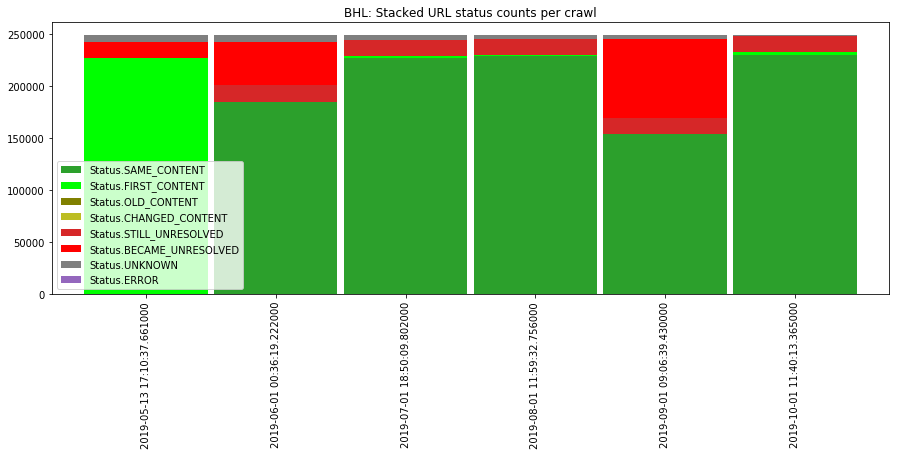

In [992]:
fig_df.plot(kind="bar", stacked=True, width=.95, color=status_color_map, figsize=(15, 5));
plt.savefig(outputPath + "stacked-query-status-counts-per-crawl")
plt.title(observatoryName + ": Stacked URL status counts per crawl");

BHL: Stacked URL Status Counts Over Time (Stepped)


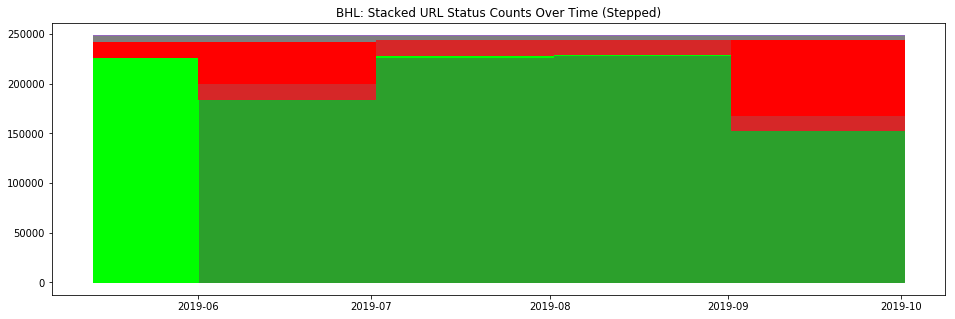

In [993]:
# Make figure
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(111)

# Fill in space between lines
x = fig_df.index.append(pd.Index([datetime.datetime.now()]))
y1 = pd.Series({ q : 0 for q in x })

columns = fig_df.columns
n = len(columns)
for i in range(0, n):
    y2 = y1 + fig_df[columns[i]] + 0
    ax.fill_between(x, y1, y2, step="post", color=status_color_map[i])
    y1 = y2

print(observatoryName + ": Stacked URL Status Counts Over Time (Stepped)")
plt.savefig(outputPath + "stacked-query-status-counts-over-time")
plt.title(observatoryName + ": Stacked URL Status Counts Over Time (Stepped)");

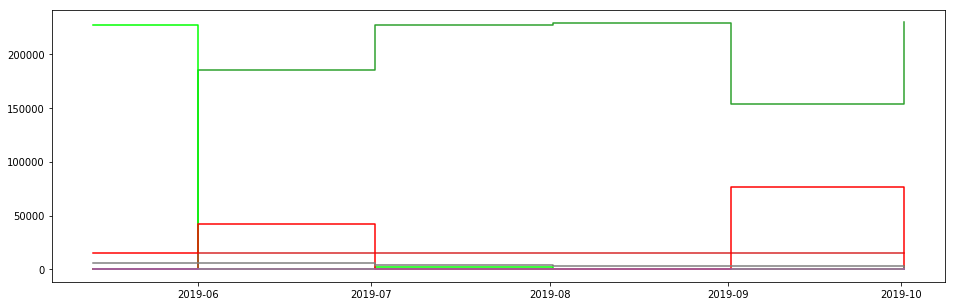

In [994]:
# Make figure
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(111)

# Draw stepped lines
x = fig_df.index
for status in fig_df.columns:
    y = fig_df[status]
    plt.step(x, y, where="post", color=col_hex[status_colors[status]])

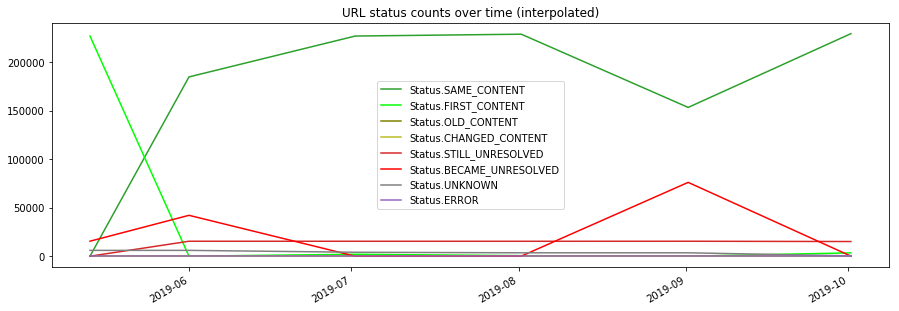

In [995]:
ax = fig_df.plot(kind="line", stacked=False, color=status_color_map, figsize=(15, 5),
                 title="URL status counts over time (interpolated)")

Fun fact: there are many URLs that never resolved

In [996]:
crawl_status_totals_df

,Status.UNKNOWN,Status.FIRST_CONTENT,Status.SAME_CONTENT,Status.CHANGED_CONTENT,Status.OLD_CONTENT,Status.BECAME_UNRESOLVED,Status.STILL_UNRESOLVED,Status.ERROR
2019-05-13 17:10:37.661,6011,227043,0,0,0,15460,0,0
2019-06-01 00:36:19.222,6011,33,184882,1,0,42160,15427,0
2019-07-01 18:50:09.802,4061,1983,227048,5,0,17,15400,0
2019-08-01 11:59:32.756,3505,561,228952,43,0,67,15386,0
2019-09-01 09:06:39.430,3504,1,153437,9,0,76134,15429,0
2019-10-01 11:40:13.365,336,3443,229513,12,0,77,15133,0


In [997]:
crawl_status_totals_df[[Status.FIRST_CONTENT, Status.CHANGED_CONTENT]].sum(axis=1)

2019-05-13 17:10:37.661    227043
2019-06-01 00:36:19.222        34
2019-07-01 18:50:09.802      1988
2019-08-01 11:59:32.756       604
2019-09-01 09:06:39.430        10
2019-10-01 11:40:13.365      3455
dtype: int64

In [998]:
crawl_health_df = pd.DataFrame(index=crawl_status_totals_df.index)

crawl_health_df["Available URLs"] = crawl_status_totals_df[[
    Status.FIRST_CONTENT,
    Status.SAME_CONTENT,
    Status.CHANGED_CONTENT,
    Status.OLD_CONTENT
]].sum(axis=1)

crawl_health_df["Stable URLs"] = crawl_status_totals_df[[
    Status.FIRST_CONTENT,
    Status.SAME_CONTENT,
    Status.CHANGED_CONTENT,
    Status.OLD_CONTENT
]].sum(axis=1)

crawl_health_df

,Available URLs,Stable URLs
2019-05-13 17:10:37.661,227043,227043
2019-06-01 00:36:19.222,184916,184916
2019-07-01 18:50:09.802,229036,229036
2019-08-01 11:59:32.756,229556,229556
2019-09-01 09:06:39.430,153447,153447
2019-10-01 11:40:13.365,232968,232968


## Running URL and content totals

In [999]:
%%time

crawlUrlTotals = [0] * numCrawls
crawlDatasetTotals = [0] * numCrawls
crawlAbandonedTotals = [0] * numCrawls
crawlFirstBreakTotals = [0] * numCrawls
crawlFirstChangeTotals = [0] * numCrawls
crawlFirstUnreliableTotals = [0] * numCrawls

numUnavailable = 0
numVeryAvailable = 0
numVeryStable = 0
numVeryReliable = 0
numAbandoned = 0

totalNumResolves = 0
totalNumBreaks = 0
totalNumContents = 0
totalNumContentChanges = 0
maxNumContentChanges = 0

maxNumBreaks   = totalNumUrls * (np.ceil(numCrawls / 2)) # Round up; if the availability is [0, 1, 0] across three crawls, there are at most two breaks
maxNumContents = totalNumUrls * (numCrawls)

breakCounts = []
contentChangeCounts = []

for _, lifetime in urlLifetimes.items():
    #if lifetime.firstCrawlPosition:
    crawlUrlTotals[lifetime.firstCrawlPosition] += 1

    totalNumResolves += lifetime.numResolves
    totalNumBreaks += lifetime.numBreaks
    totalNumContents += lifetime.numContents
    totalNumContentChanges += lifetime.numContentChanges
    maxNumContentChanges += lifetime.numResolves - 1

    breakCounts.append(lifetime.numBreaks)
    contentChangeCounts.append(lifetime.numContentChanges)

    if lifetime.numBreaks == 0:
        numVeryAvailable += 1

    if lifetime.numContents == 1:
        numVeryStable += 1

    if lifetime.numBreaks == 0 and lifetime.numContents == 1:
        numVeryReliable += 1

    if lifetime.lastKnownStatus in (Status.BECAME_UNRESOLVED, Status.STILL_UNRESOLVED):
        numUnavailable += 1

    firstUnreliable = numCrawls
    if lifetime.firstBreakPosition is not None:
        crawlFirstBreakTotals[lifetime.firstBreakPosition] += 1
        firstUnreliable = lifetime.firstBreakPosition

    if lifetime.firstChangePosition is not None:
        crawlFirstChangeTotals[lifetime.firstChangePosition] += 1
        firstUnreliable = min(lifetime.firstChangePosition, firstUnreliable)
    
    if firstUnreliable < numCrawls:
        crawlFirstUnreliableTotals[firstUnreliable] += 1

    # If the URL stopped being queried, find out when
    for i, status in enumerate(lifetime.statuses[::-1]):
        if status != Status.UNKNOWN:
            break

    if i > 0:
        crawlAbandonedTotals[numCrawls - i] += 1
        numAbandoned += 1

for _, lifetime in contentLifetimes.items():
    #if lifetime.firstCrawlPosition:
    crawlDatasetTotals[lifetime.firstCrawlPosition] += 1

reallyBads = list()
for url, lifetime in urlLifetimes.items():
    skip = False
    for status in lifetime.statuses:
        if status not in (Status.BECAME_UNRESOLVED, Status.STILL_UNRESOLVED, Status.UNKNOWN):
            skip = True
            break
    if not skip:
        reallyBads.append((url, lifetime))

numReallyBads = len(reallyBads)

np.save(outputPath + "totals", {
    "totalNumUrls" : totalNumUrls,
    "totalNumResolves" : totalNumResolves,
    "totalNumBreaks" : totalNumBreaks,
    "totalNumContents" : totalNumContents,
    "totalNumContentChanges" : totalNumContentChanges,
    "maxNumContentChanges" : maxNumContentChanges,
    "numReallyBads" : numReallyBads
})

CPU times: user 766 ms, sys: 0 ns, total: 766 ms
Wall time: 776 ms


In [1000]:
textReport = ""

textReport += ("%s of URLs (%s total) were always available\n"
    % ("{0:.2%}".format(numVeryAvailable / totalNumUrls), "{0:,}".format(numVeryAvailable)))
textReport += ("%s of URLs (%s total) always produced the same content\n"
    % ("{0:.2%}".format(numVeryStable / totalNumUrls), "{0:,}".format(numVeryStable)))
textReport += ("%s of URLs (%s total) were always available and always produced the same content\n"
    % ("{0:.2%}".format(numVeryReliable / totalNumUrls), "{0:,}".format(numVeryReliable)))
textReport += ("%s of URLs (%s total) were unresolved in the last crawl\n"
    % ("{0:.2%}".format(numUnavailable / totalNumUrls), "{0:,}".format(numUnavailable)))
textReport += ("%s of URLs (%s total) never resolved in any crawl\n"
    % ("{0:.2%}".format(numReallyBads / totalNumUrls), "{0:,}".format(numReallyBads)))
textReport += ("%s of URLs (%s total) stopped being queried\n"
    % ("{0:.2%}".format(numAbandoned / totalNumUrls), "{0:,}".format(numAbandoned)))
textReport += ("On average, URLs break %s of the time between queries\n"
    % ("{0:.2%}".format(totalNumBreaks / (totalNumResolves + totalNumBreaks))))
textReport += ("On average, URLs contents change %s of the time between queries\n"
    % ("{0:.2%}".format(totalNumContentChanges / maxNumContentChanges)))

file = open(outputPath + "report.txt", "w+")
file.write(textReport)
file.close()

print(textReport)

57.41% of URLs (142,673 total) were always available
93.76% of URLs (232,996 total) always produced the same content
57.39% of URLs (142,633 total) were always available and always produced the same content
6.25% of URLs (15,531 total) were unresolved in the last crawl
6.22% of URLs (15,450 total) never resolved in any crawl
0.14% of URLs (336 total) stopped being queried
On average, URLs break 9.63% of the time between queries
On average, URLs contents change 0.01% of the time between queries



In [1001]:
numUnreliable = totalNumUrls - numVeryReliable
numUnreliable

105881

In [1002]:
numUnstable = totalNumUrls - numVeryStable
print(numUnstable)
print(numUnstable / numUnreliable)

15518
0.1465607616097317


In [1003]:
numUnavailable = totalNumUrls - numVeryAvailable
print(numUnavailable)
print(numUnavailable / numUnreliable)

105841
0.999622217395


In [1004]:
print(numUnavailable)
print(numUnavailable / numUnreliable)

105841
0.999622217395


In [1005]:
breakCountFrequencies = np.unique(breakCounts, return_counts=True)
np.save(outputPath + "url-break-frequencies.npy", breakCountFrequencies)

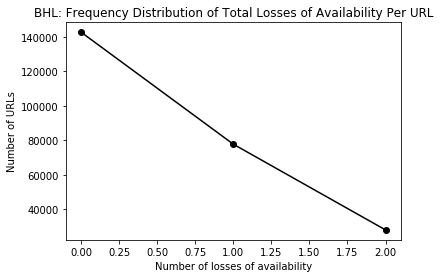

In [1006]:
plt.plot(breakCountFrequencies[0], breakCountFrequencies[1], "-o", color="black");
plt.xlabel("Number of losses of availability");
plt.ylabel("Number of URLs");
plt.savefig(outputPath + "url-break-freq-dist.png")
plt.title(observatoryName + ": Frequency Distribution of Total Losses of Availability Per URL");

In [1007]:
contentChangeCountFrequencies = np.unique(contentChangeCounts, return_counts=True)
np.save(outputPath + "url-content-change-frequencies.npy", contentChangeCountFrequencies)

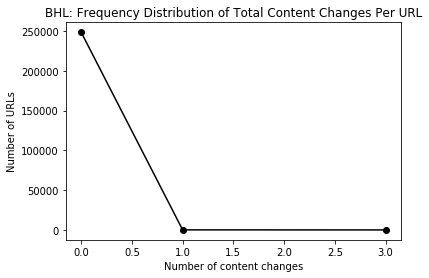

In [1008]:
plt.plot(contentChangeCountFrequencies[0], contentChangeCountFrequencies[1], "-o", color="black");
plt.xlabel("Number of content changes");
plt.ylabel("Number of URLs");
plt.savefig(outputPath + "url-content-change-freq-dist.png")
plt.title(observatoryName + ": Frequency Distribution of Total Content Changes Per URL");

In [1009]:
maxCount = max(len(breakCountFrequencies[0]), len(contentChangeCountFrequencies[0]))

frequencies_df = pd.DataFrame(
    columns=["Unresolvable", "Changed Content"],
    index=range(maxCount),
    data=0
)

for i, numBreaks in enumerate(breakCountFrequencies[0]):
    numUrls = breakCountFrequencies[1][i]
    frequencies_df["Unresolvable"][numBreaks] = numUrls

for i, numChanges in enumerate(contentChangeCountFrequencies[0]):
    numUrls = contentChangeCountFrequencies[1][i]
    frequencies_df["Changed Content"][numChanges] = numUrls

frequencies_df

,Unresolvable,Changed Content
0,142673,248446
1,77767,67
2,28074,0


Text(0.5,1,'BHL: Frequency Distribution of Breaks and Changes')

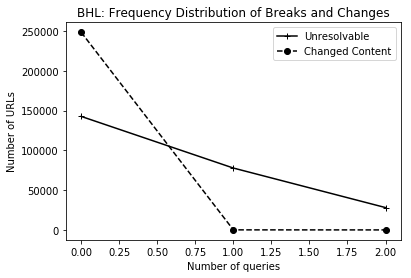

In [1010]:
frequencies_df.plot(color="black", style=["-+", "--o"])
plt.ylabel("Number of URLs")
plt.xlabel("Number of queries")
plt.savefig(outputPath + "url-behavior-freq-dist")
plt.title(observatoryName + ": Frequency Distribution of Breaks and Changes")

In [1011]:
crawl_totals_df = pd.DataFrame(
    index   = [datetime.datetime.strptime(str(x[1]), "%Y-%m-%dT%H:%M:%S.%fZ") for x in crawlDates],
)

crawl_totals_df["New URLs"] = crawlUrlTotals
crawl_totals_df["New Contents"] = crawlDatasetTotals
crawl_totals_df["Abandoned"] = crawlAbandonedTotals
crawl_totals_df["First Break"] = crawlFirstBreakTotals
crawl_totals_df["First Change"] = crawlFirstChangeTotals
crawl_totals_df["First Unreliable"] = crawlFirstUnreliableTotals
crawl_totals_df["Total URLs"] = crawl_totals_df["New URLs"].cumsum()
crawl_totals_df["Total Contents"] = crawl_totals_df["New Contents"].cumsum()
crawl_totals_df["Total Abandoned"] = crawl_totals_df["Abandoned"].cumsum()
crawl_totals_df["Total Intermittent"] = crawl_totals_df["First Break"].cumsum()
crawl_totals_df["Total Unstable"] = crawl_totals_df["First Change"].cumsum()
crawl_totals_df["Total Unreliable"] = crawl_totals_df["First Unreliable"].cumsum()
crawl_totals_df["Percent Very Available"] = 1 - crawl_totals_df["Total Intermittent"] / crawl_totals_df["Total URLs"]
crawl_totals_df["Percent Very Stable"] = 1 - crawl_totals_df["Total Unstable"] / crawl_totals_df["Total URLs"]
crawl_totals_df["Percent Very Reliable"] = 1 - crawl_totals_df["Total Unreliable"] / crawl_totals_df["Total URLs"]

crawl_totals_df

,New URLs,New Contents,Abandoned,First Break,First Change,First Unreliable,Total URLs,Total Contents,Total Abandoned,Total Intermittent,Total Unstable,Total Unreliable,Percent Very Available,Percent Very Stable,Percent Very Reliable
2019-05-13 17:10:37.661,242503,226861,0,15460,0,15460,242503,226861,0,15460,0,15460,0.936248,1.000000,0.936248
2019-06-01 00:36:19.222,0,34,0,42160,1,42161,242503,226895,0,57620,1,57621,0.762395,0.999996,0.762391
2019-07-01 18:50:09.802,1981,1982,31,17,5,20,244484,228877,31,57637,6,57641,0.764250,0.999975,0.764234
2019-08-01 11:59:32.756,581,601,25,56,42,94,245065,229478,56,57693,48,57735,0.764581,0.999804,0.764409
2019-09-01 09:06:39.430,1,10,0,48072,9,48069,245066,229488,56,105765,57,105804,0.568422,0.999767,0.568263
2019-10-01 11:40:13.365,3448,3455,280,76,11,77,248514,232943,336,105841,68,105881,0.574104,0.999726,0.573944


In [1012]:
timeFrame = [
    datetime.datetime.strptime(startDate, "%Y-%m-%d"),
    datetime.datetime.strptime(endDate, "%Y-%m-%d")
]

Text(0.5,1,'BHL: Running Total of Unique URLs and Contents')

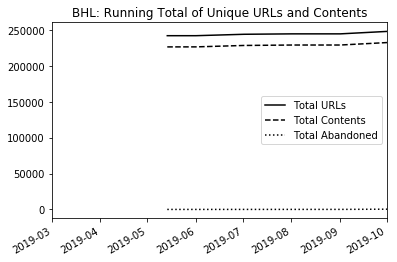

In [1013]:
crawl_totals_df[["Total URLs", "Total Contents", "Total Abandoned"]].plot(color="black", style=["-", "--", ":"]);
plt.xlim(timeFrame)
plt.savefig(outputPath + "running-total-urls-and-contents.png")
plt.title(observatoryName + ": Running Total of Unique URLs and Contents")

Text(0.5,1,'BHL: Availability and Stability Over Time')

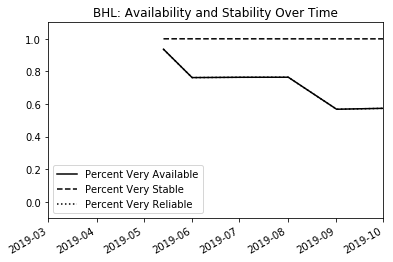

In [1018]:
crawl_totals_df[["Percent Very Available", "Percent Very Stable", "Percent Very Reliable"]].plot(color="black", style=["-", "--", ":"]);
plt.xlim(timeFrame)
plt.ylim([-.1, 1.1])
plt.savefig(outputPath + "reliability-over-time.png")
plt.title(observatoryName + ": Availability and Stability Over Time")